In [1]:
import pymove as pm
import pandas as pd
import numpy as np
import utilities.constants as const

from core.TrajectoryDF import NumPandasTraj as TrajDF
from preprocessing.filters import Filters as filt
from features.spatial_features import SpatialFeatures as spatial
from utilities.conversions import Conversions as con
from preprocessing.interpolation import Interpolate as ip

In [2]:
atlantic = pd.read_csv('./data/atlantic.csv')
atlantic = con.convert_directions_to_degree_lat_lon(atlantic, 'Latitude',"Longitude")
def convert_to_datetime(row):
        this_date = '{}-{}-{}'.format(str(row['Date'])[0:4], str(row['Date'])[4:6], str(row['Date'])[6:])
        this_time = '{:02d}:{:02d}:00'.format(int(row['Time']/100), int(str(row['Time'])[-2:]))
        return '{} {}'.format(this_date, this_time)
atlantic['DateTime'] = atlantic.apply(convert_to_datetime, axis=1)
#
gulls = pd.read_csv('./data/gulls.csv')

#geolife = pd.read_csv('./data/geolife_sample.csv')

In [3]:
%%time
#
np_atlantic = TrajDF(atlantic,
                         latitude='Latitude',
                         longitude='Longitude',
                         datetime='DateTime',
                         traj_id='ID',
                         rest_of_columns=[])
#
np_gulls = TrajDF(gulls,
                 latitude='location-lat',
                 longitude='location-long',
                 datetime='timestamp',
                 traj_id='tag-local-identifier',
                 rest_of_columns=[])

# np_geolife = TrajDF(geolife,latitude='lat',
#                      longitude='lon',
#                      datetime='datetime',
#                      traj_id='id')

CPU times: user 207 ms, sys: 11.5 ms, total: 219 ms
Wall time: 217 ms


In [4]:
%%time

np_atlantic = spatial.create_distance_between_consecutive_column(np_atlantic)
ip_atlantic = ip.interpolate_position(dataframe=np_atlantic, distance_threshold=30)
ip_atlantic.head()



CPU times: user 949 ms, sys: 446 ms, total: 1.39 s
Wall time: 51.5 s


lat    lon  Distance_prev_to_curr
traj_id  DateTime                                                
AL011851 1851-06-25 00:00:00  28.00 -94.80                    NaN
         1851-06-25 06:00:00  28.00 -95.40           58907.516366
         1851-06-25 06:00:00  28.00 -95.40               0.000000
         1851-06-25 12:00:00  28.05 -95.95           54271.559104
         1851-06-25 12:00:00  28.00 -96.00            7416.031630

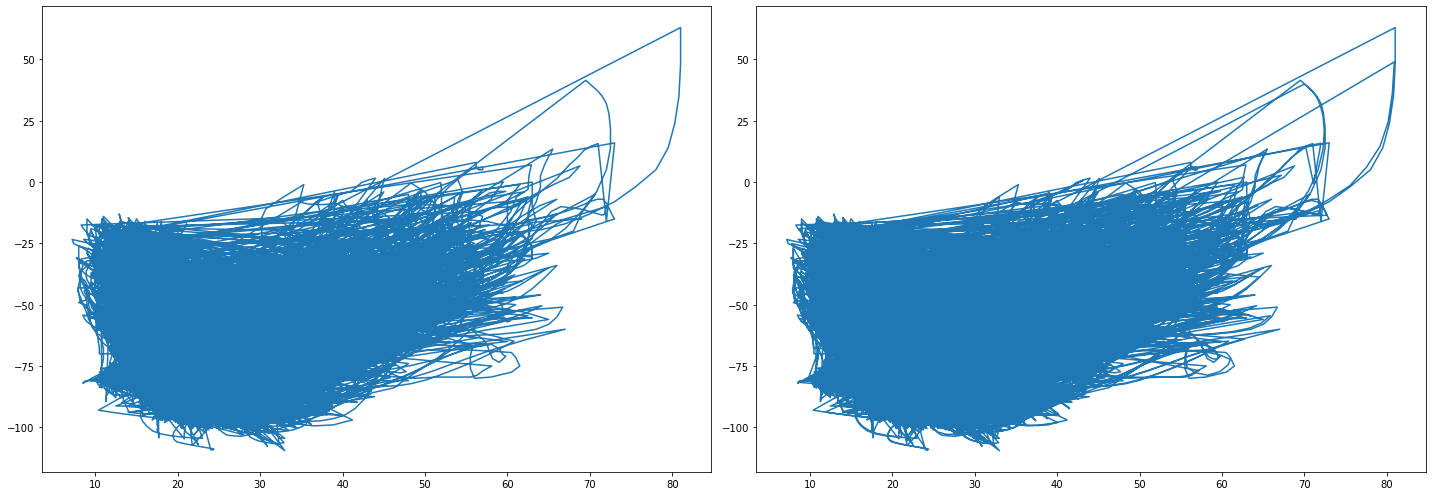

In [5]:
#Here, lets plot the original and the interpolated trajectory
# side by side.
import matplotlib.pyplot as plt
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 7))


ax1.plot(np_atlantic[const.LAT], np_atlantic[const.LONG])
ax2.plot(ip_atlantic[const.LAT], ip_atlantic[const.LONG])
plt.tight_layout()

In [6]:
# Filter data using the IQR method.
filtered_df = filt.filter_outliers_by_consecutive_distance(ip_atlantic)

In [7]:
%%time
# FIlter data using hampel filter.
small = filt.hampel_outlier_detection(ip_atlantic, 'Distance_prev_to_curr')
small.shape

CPU times: user 28.9 s, sys: 7.34 ms, total: 28.9 s
Wall time: 28.9 s


/home/yjharanwala/Desktop/NumMobility/preprocessing/filters.py:698: UserWarning: If kinematic features have been generated on the dataframe, then make sure to generate them again as outlier detection drops the point from the dataframe and does not run the kinematic features again.
  warnings.warn("If kinematic features have been generated on the dataframe, then make "


(88502, 3)

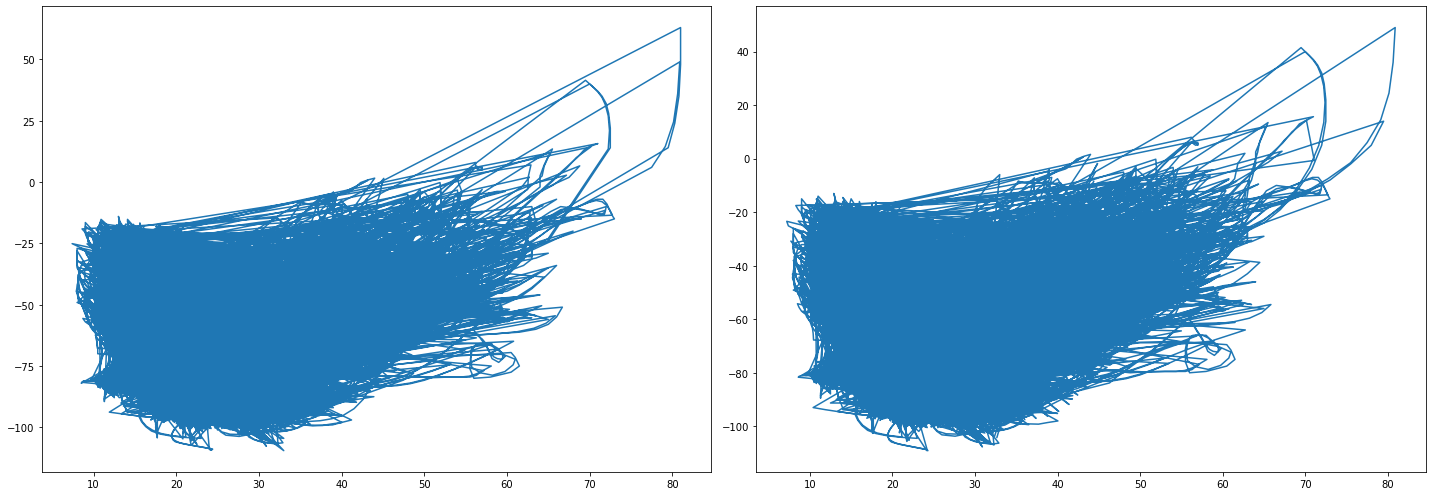

In [8]:
# Now, plot the data that is interpolated, and then filtered
# using the IQR method and the hampel filter side by side.
fig2, (bx1, bx2) = plt.subplots(1, 2, figsize=(20, 7))


bx1.plot(filtered_df[const.LAT], filtered_df[const.LONG])
bx2.plot(small[const.LAT], small[const.LONG])
plt.tight_layout()

In [9]:


%%time

np_gulls = spatial.create_distance_between_consecutive_column(np_gulls)
ip_gulls = ip.interpolate_position(dataframe=np_gulls, distance_threshold=15000)
ip_gulls.head()

CPU times: user 746 ms, sys: 269 ms, total: 1.02 s
Wall time: 1min 2s


lat        lon  Distance_prev_to_curr
traj_id DateTime                                                        
91732   2009-05-27 14:00:00  61.247830  24.586170                    NaN
        2009-05-27 20:00:00  61.232670  24.582170            1699.244398
        2009-05-27 21:30:00  61.270585  24.143500           23836.153646
        2009-05-28 02:00:00  61.511420  24.022085           27548.835323
        2009-05-28 02:00:00  61.511420  24.022085               0.000000

In [10]:
ip_gulls.shape

(106020, 3)

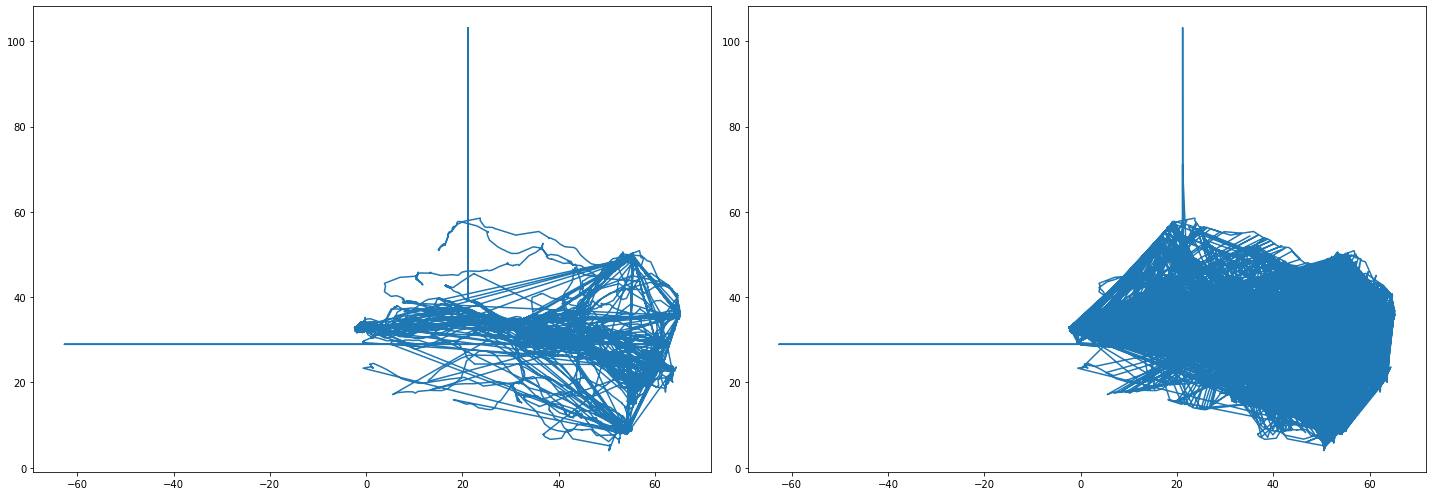

In [11]:
import matplotlib.pyplot as plt
fig3, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 7))


ax1.plot(np_gulls[const.LAT], np_gulls[const.LONG])
ax2.plot(ip_gulls[const.LAT], ip_gulls[const.LONG])
plt.tight_layout()

In [12]:
filtered_df = filt.filter_outliers_by_consecutive_distance(ip_gulls)

In [13]:
%%time

small = filt.hampel_outlier_detection(ip_gulls, 'Distance_prev_to_curr')
small.shape

CPU times: user 39.5 s, sys: 66.2 ms, total: 39.6 s
Wall time: 39.6 s


/home/yjharanwala/Desktop/NumMobility/preprocessing/filters.py:698: UserWarning: If kinematic features have been generated on the dataframe, then make sure to generate them again as outlier detection drops the point from the dataframe and does not run the kinematic features again.
  warnings.warn("If kinematic features have been generated on the dataframe, then make "


(95897, 3)

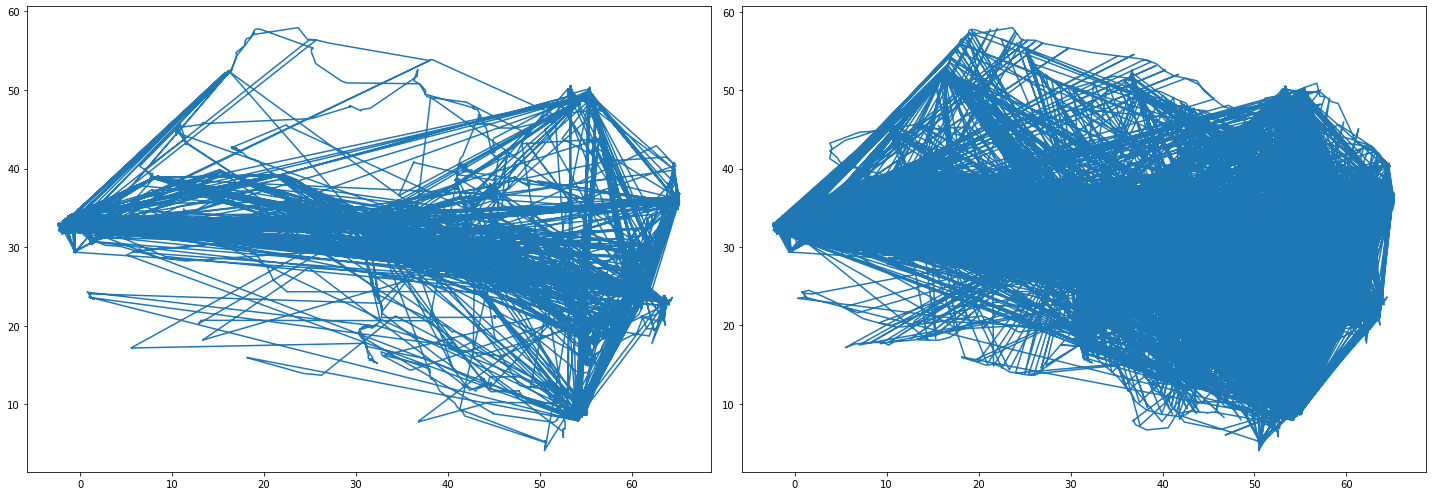

In [14]:
fig4, (bx1, bx2) = plt.subplots(1, 2, figsize=(20, 7))


bx1.plot(filtered_df[const.LAT], filtered_df[const.LONG])
bx2.plot(small[const.LAT], small[const.LONG])
plt.tight_layout()